In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
np.random.seed(0)

In [3]:
# Generate Data
num_sample = 200

# Generate Data for class -> 0
mean0 = [2,2]
cov0 = [[1,0],[0,1]]

class0_data = np.random.multivariate_normal(mean0, cov0, num_sample)

print(class0_data.shape)

(200, 2)


In [4]:
mean1 = [-2,-2]
cov1 = [[1,0], [0,1]]

class1_data = np.random.multivariate_normal(mean1, cov1, num_sample)

In [5]:
X = np.concatenate((class0_data, class1_data), axis=0)
y = np.concatenate((np.zeros(num_sample), np.ones(num_sample)), axis=0)
print(X.shape, y.shape)

(400, 2) (400,)


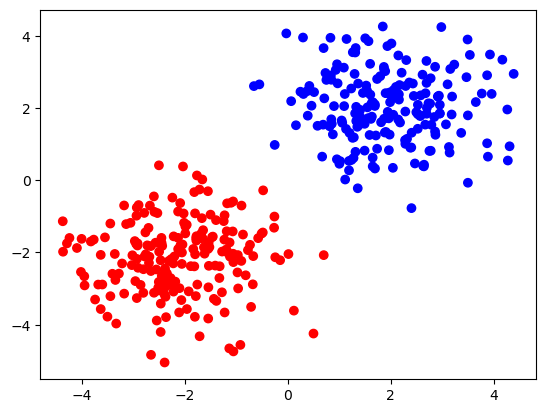

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.show()

In [7]:
class0_prob = np.sum(y == 0) / len(y)
class1_prob = np.sum(y == 1) / len(y)

class0_mean = np.mean(X[y == 0], axis=0)
class1_mean = np.mean(X[y ==1], axis=0)


class0_cov = np.cov(X[y == 0], rowvar=False)
class1_cov = np.cov(X[y == 1], rowvar=False)
def baysian_clssifier(x):
    likehood0 = multivariate_normal.pdf(x, class0_mean, class0_cov)
    likehood1 = multivariate_normal.pdf(x, class1_mean, class1_cov)

    post0 = likehood0 * class0_prob
    post1 = likehood1 * class1_prob

    return 1 if post1 > post0 else 0

In [8]:
h = 0.02 # step size
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [9]:
yy.shape

(566, 538)

In [10]:
Z = np.array([baysian_clssifier(np.array([x,y])) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

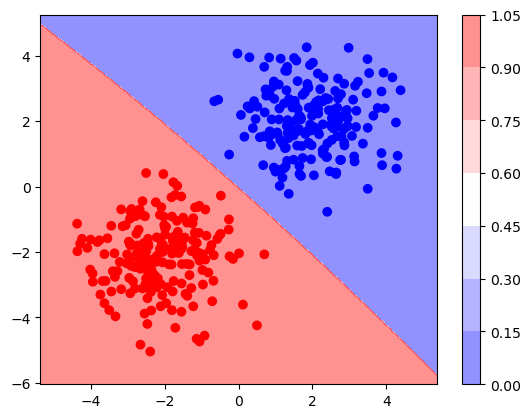

In [11]:
plt.contourf(xx, yy, Z, alpha = 0.5, cmap='bwr')
plt.colorbar()

plt.scatter(X[:,0], X[:,1],c=y,cmap='bwr')
plt.show()